이 노트북의 코드에 대한 설명은 [반복 교차 검증](https://tensorflow.blog/2017/12/27/%EB%B0%98%EB%B3%B5-%EA%B5%90%EC%B0%A8-%EA%B2%80%EC%A6%9D/) 글을 참고하세요.

In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy

CPython 3.5.6
IPython 6.5.0

sklearn 0.20.0
numpy 1.15.2
scipy 1.1.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [4]:
iris = load_iris()
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

RepeatedKFold

In [5]:
kfold = KFold(n_splits=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
scores, scores.mean()

(array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333]),
 0.9266666666666665)

In [6]:
from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rkfold)
scores, scores.mean()

(array([1.        , 1.        , 0.93333333, 0.96666667, 0.96666667,
        0.96666667, 1.        , 0.93333333, 1.        , 0.93333333,
        0.96666667, 0.9       , 1.        , 1.        , 0.96666667,
        0.93333333, 1.        , 0.9       , 0.96666667, 1.        ,
        0.93333333, 0.96666667, 1.        , 0.93333333, 0.96666667]),
 0.9653333333333333)

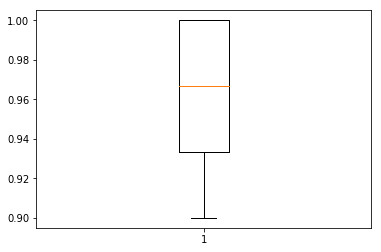

In [7]:
plt.boxplot(scores)
plt.show()

RepeatedStratifiedKFold

In [8]:
skfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=skfold)
scores, scores.mean()

(array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 0.9733333333333334)

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
scores, scores.mean()

(array([1.        , 0.96666667, 0.96666667, 0.93333333, 0.96666667,
        0.93333333, 1.        , 0.96666667, 0.96666667, 0.96666667,
        0.96666667, 0.9       , 1.        , 0.96666667, 0.96666667,
        1.        , 0.96666667, 0.96666667, 0.93333333, 0.96666667,
        0.96666667, 0.96666667, 0.96666667, 1.        , 0.93333333]),
 0.9653333333333335)

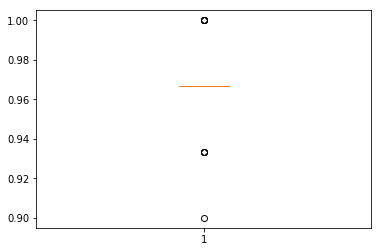

In [10]:
plt.boxplot(scores)
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(logreg, param_grid, cv=rskfold, return_train_score=True, iid=False)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x7ff472827c18>,
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [12]:
grid_search.score(X_test, y_test), grid_search.best_params_, grid_search.best_score_

(1.0, {'C': 1}, 0.9556220591003199)

In [13]:
for k in grid_search.cv_results_:
    if 'split' in k:
        print(k, grid_search.cv_results_[k])

split15_train_score [0.88764045 0.87640449 0.92134831 0.97752809 0.97752809 1.
 1.        ]
split13_test_score [0.81818182 0.95454545 1.         1.         0.95454545 0.95454545
 0.90909091]
split21_test_score [0.82608696 0.82608696 0.95652174 0.95652174 0.91304348 0.91304348
 0.91304348]
split24_test_score [0.95238095 0.9047619  0.95238095 1.         1.         0.95238095
 0.95238095]
split11_train_score [0.8988764  0.86516854 0.93258427 0.96629213 0.97752809 0.97752809
 0.97752809]
split2_train_score [0.92134831 0.87640449 0.95505618 0.96629213 1.         1.
 1.        ]
split9_train_score [0.89010989 0.87912088 0.92307692 0.96703297 0.97802198 0.97802198
 0.97802198]
split15_test_score [0.86956522 0.86956522 0.95652174 0.95652174 0.95652174 0.95652174
 0.95652174]
split3_test_score [0.72727273 0.90909091 0.90909091 1.         1.         1.
 1.        ]
split14_train_score [0.9010989  0.89010989 0.94505495 0.96703297 0.97802198 0.97802198
 0.97802198]
split16_train_score [0.91011236 